In [2]:
import pandas as pd
import numpy as np
import json

In [6]:
biz_file = open('yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurance')

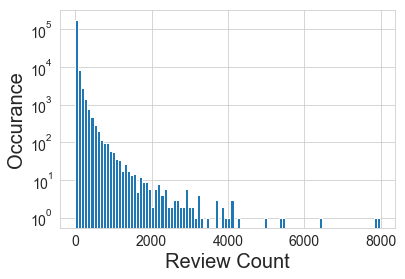

In [12]:
# Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurance', fontsize=14)

In [9]:
type(biz_df)

pandas.core.frame.DataFrame

In [11]:
biz_df.shape

(188593, 15)

# Fixed-width Binning

In [13]:
import numpy as np

### Map to evenly spaced bins 0-9 by division

In [14]:
# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)

In [26]:
small_counts

array([69, 86, 46,  6, 10, 51, 77, 69, 91,  6,  7, 77, 18, 78, 54, 49, 92,
        1, 51, 36])

In [16]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([6, 8, 4, 0, 1, 5, 7, 6, 9, 0, 0, 7, 1, 7, 5, 4, 9, 0, 5, 3])

In [24]:
np.floor_divide(small_counts, 10).shape

(20,)

### Exponential-width bins

In [28]:
# An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [29]:
# Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

# Quantile Binning

In [41]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9,])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     9.0
0.6    12.0
0.7    19.0
0.8    31.0
0.9    66.0
Name: review_count, dtype: float64

Text(0, 0.5, 'Occurance')

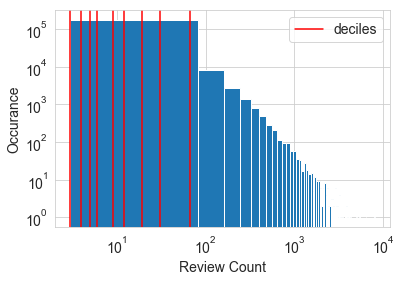

In [43]:
# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurance', fontsize=14)

To compute the quantiles and map data into quantile bins, we can use the Pandas library, as shown in Example 2-5. **Pandas.Series.quantile** compute the quantiles. **pandas.qcut** maps data into desired number of quantiles.

### Continue example with large counts

In [44]:
# map the counts to quartiles 
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [45]:
# Compute the quantiles themselvs
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

In [1]:
ls

Feature Engineering.ipynb            h/
Python.ipynb                         microsoft-malware/
Raise, assert, exceptions.ipynb      titanic/
banco/                               yelp_academic_dataset_business.json
compress-df/


# One-Hot-Encoding VS Dummy

In [12]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
pd.get_dummies(data, columns=['Pclass'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,1,0


In [13]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown='ignore')

In [15]:
x = data['Pclass']

In [21]:
# Binning

In [ ]:
import pandas as pd
# train_subset data is first 10K rows of 6+GB set
df = pd.read_csv('train.csv')

In [22]:
# How many unique features should we have after?
len(df['device_id'].unique())

NameError: name 'df' is not defined

In [24]:
# For each category, we want to calculate
# Theta = [counts, p(click), p(no_click), p(click)/p(no_click)]

def click_counting(x, bin_column):
    clicks = pd.Series(x[x['click'] > 0][bin_column].value_counts(), name ='clicks')
    counts = pd.DataFrame([clicks, no_clicks]).T.fillna('0')counts['total_clicks'] = counts['clicks'].astype('int64') + counts['no_clicks'].astype('int64')
    return counts

SyntaxError: invalid syntax (<ipython-input-24-e871f6a0f5d8>, line 6)